# Base de dados (Kaggle)

<https://www.kaggle.com/c/dogs-vs-cats/>

# Pré-processamento

In [1]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 20, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

In [2]:
import os
current_dir = os.path.abspath(os.getcwd())

In [3]:
import glob

original_path = current_dir + "\\train\\"
dog_img_files = glob.glob(original_path + 'dog.*')

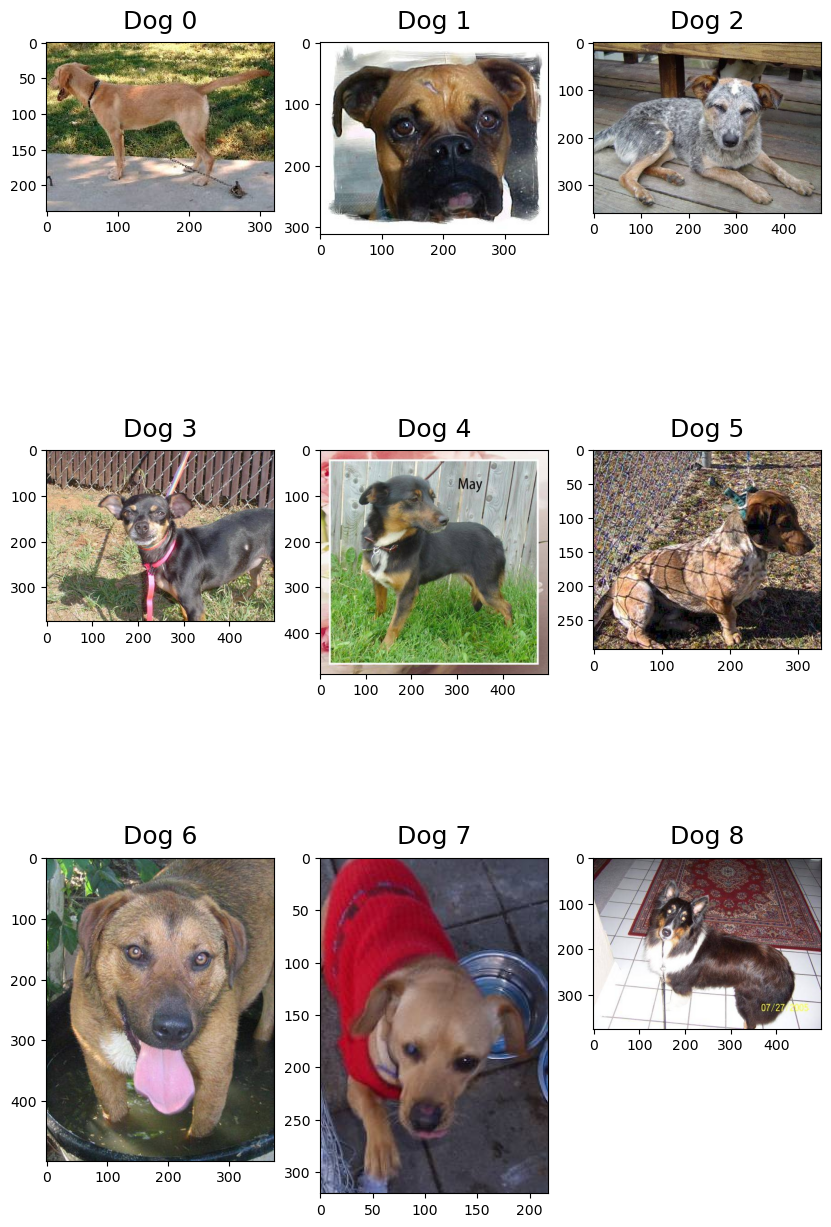

In [4]:
import random
import cv2

random_dog_imgs = [cv2.imread(img_file) for img_file in random.sample(dog_img_files, 9)]
random_dog_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in random_dog_imgs]
titles = ['Dog ' + str(i) for i in range(9)]
showMultipleImages(random_dog_imgs, titles, (10, 15), 3, 3)

In [5]:
folder = '\\cats_and_dogs_dataset'
train_folder = current_dir + folder + '\\train'
test_folder = current_dir + folder + '\\test'
val_folder = current_dir + folder + '\\validation'

In [6]:
import os

os.mkdir(current_dir + folder)
os.mkdir(train_folder)
os.mkdir(test_folder)
os.mkdir(val_folder)

new_folder_train_dogs = train_folder + '\\dogs'
new_folder_train_cats = train_folder + '\\cats'
new_folder_val_dogs = val_folder + '\\dogs'
new_folder_val_cats = val_folder + '\\cats'
new_folder_test_dogs = test_folder + '\\dogs'
new_folder_test_cats = test_folder + '\\cats'

os.mkdir(new_folder_train_dogs)
os.mkdir(new_folder_train_cats)
os.mkdir(new_folder_val_dogs)
os.mkdir(new_folder_val_cats)
os.mkdir(new_folder_test_dogs)
os.mkdir(new_folder_test_cats)

In [10]:
import shutil

percent_val = 0.10
percent_test = 0.20

def moveImagesToCorrectFolder():
    dog_train_files = glob.glob(original_path + 'dog.*')
    cat_train_files = glob.glob(original_path + 'cat.*')
    
    for f in dog_train_files:
        rand_val = random.random()
        filename = f.split('\\')[-1]
        if rand_val <= percent_val:
            shutil.move(f, new_folder_val_dogs + '\\' + filename)
        elif rand_val > percent_val and rand_val <= percent_val + percent_test:
            shutil.move(f, new_folder_test_dogs + '\\' + filename)
        else:
            shutil.move(f, new_folder_train_dogs + '\\' + filename)
            
    for f in cat_train_files:
        rand_val = random.random()
        filename = f.split('\\')[-1]
        if rand_val <= percent_val:
            shutil.move(f, new_folder_val_cats + '\\' + filename)
        elif rand_val > percent_val and rand_val <= percent_val + percent_test:
            shutil.move(f, new_folder_test_cats + '\\' + filename)
        else:
            shutil.move(f, new_folder_train_cats + '\\' + filename)

moveImagesToCorrectFolder()
os.rmdir(original_path)